In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import sys
sys.path.append("../../..")
sys.path.append("../..")
sys.path.append("..")
sys.path.append(".")
from helpers.labellines import *
import engine
import engine.magic_moment_method.vehicle_params as vehicles

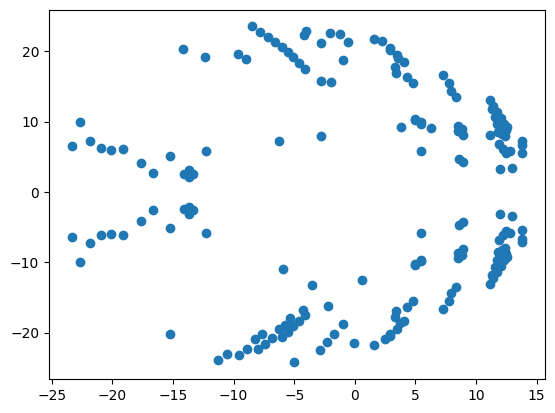

In [74]:
ggv = pd.read_csv("GGV.csv")
plt.scatter(ggv["vehicle_accelerations_NTB_0"], ggv["vehicle_accelerations_NTB_1"]) #, easy_driver.temp["s_dot"])
plt.show()

Text(0.5, 1.0, 'G-G-V: Long vs Lateral Acceleration at Varying Speeds')

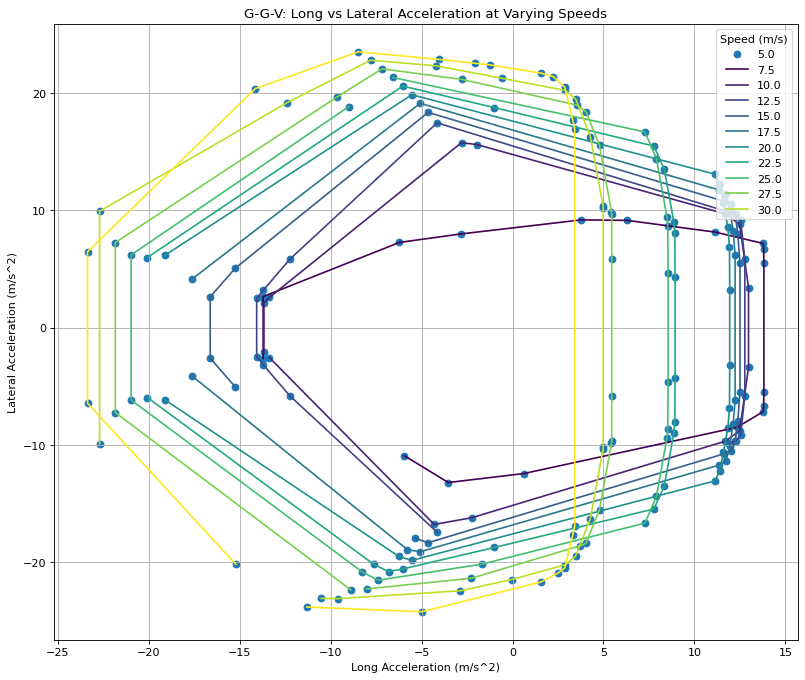

In [77]:
fig = plt.figure(figsize=(12, 10), dpi=80)
col = plt.get_cmap('viridis')

plt.scatter(ggv["vehicle_accelerations_NTB_0"], ggv["vehicle_accelerations_NTB_1"])
for vel in ggv["s_dot"].unique():
    temp_df = ggv[ggv["s_dot"] == vel]
    color = col((vel-5)/(30-5))
    plt.plot(temp_df["vehicle_accelerations_NTB_0"], temp_df["vehicle_accelerations_NTB_1"], c=color)  
plt.grid()
plt.ylabel("Lateral Acceleration (m/s^2)")
plt.xlabel("Long Acceleration (m/s^2)")
plt.legend(list(ggv["s_dot"].unique()), title = "Speed (m/s)", loc = "upper right")
plt.title("G-G-V: Long vs Lateral Acceleration at Varying Speeds")

Text(0.5, 0.92, 'G-G-V Diagram')

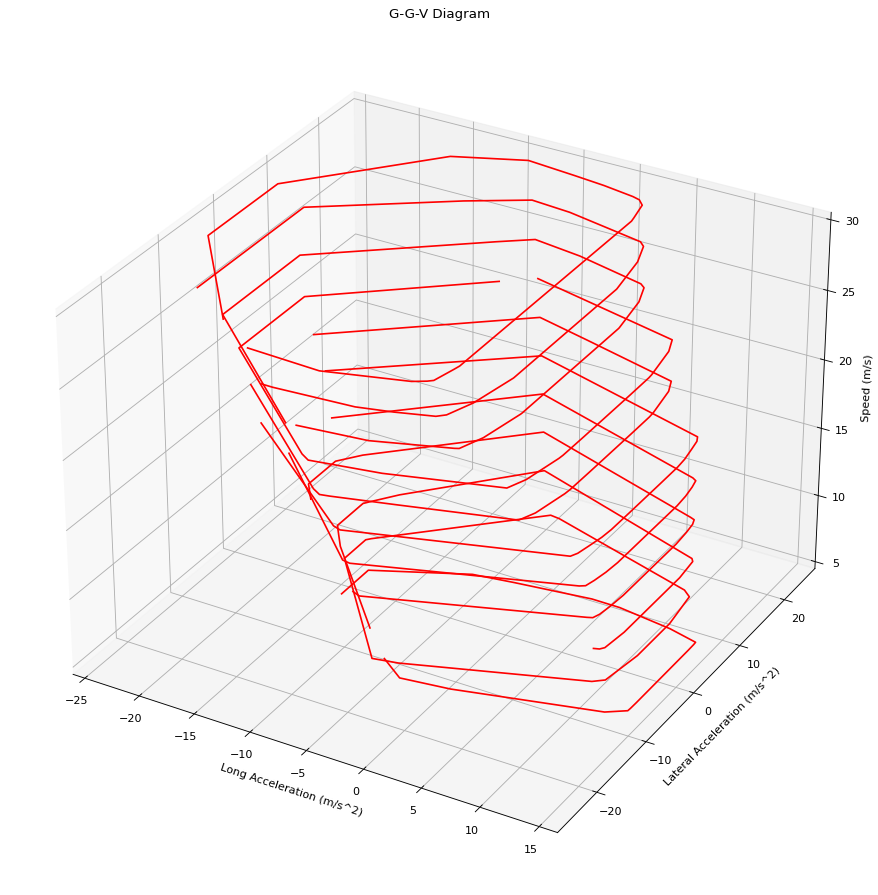

In [76]:

fig = plt.figure(figsize=(14, 14), dpi=80)
ax = fig.add_subplot(111, projection='3d')
for vel in ggv["s_dot"].unique():
    temp_df = ggv[ggv["s_dot"] == vel]
    ax.plot(temp_df["vehicle_accelerations_NTB_0"], temp_df["vehicle_accelerations_NTB_1"], temp_df["s_dot"], c='r')  
ax.set_ylabel("Lateral Acceleration (m/s^2)")
ax.set_xlabel("Long Acceleration (m/s^2)")
ax.set_zlabel("Speed (m/s)")
ax.set_title("G-G-V Diagram")